In [1]:
import numpy as np
from skimage import io
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# Leer el archivo de imágenes numpy
imagenes = np.load('face_procesadas.npy')

# Convertir imágenes a una matriz 2D
n_imagenes, h, w = imagenes.shape
imagenes_2d = imagenes.reshape((n_imagenes, h*w))

# Cambiar de base los valores como estan todos en escala de 0-255
imagenes_2d = imagenes_2d / 255.0 

print("Minino valor:", imagenes_2d.min(), "Maximo valor:", imagenes_2d.max())

# Generar modelo PCA
modelo_pca = PCA() 
modelo_pca.fit(imagenes_2d)


Minino valor: 0.0 Maximo valor: 1.0


PCA()

Dimension de los componentes principales (230, 2500)
Dimension de los valores propios (230,)


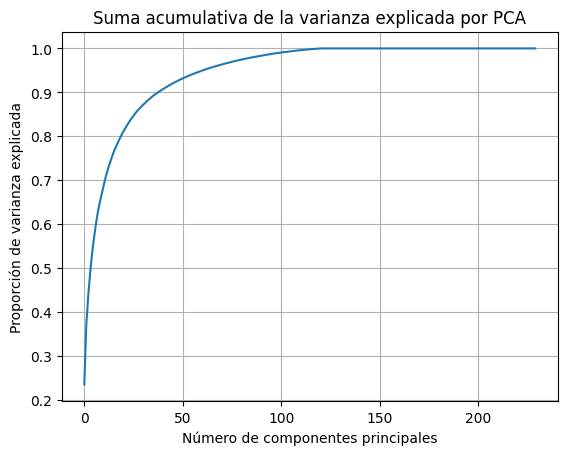

Número de componentes necesarios para explicar el 90% de la varianza: 39


In [3]:
# Obtener componentes principales y valores propios
componentes_principales = modelo_pca.components_
valores_propios = modelo_pca.explained_variance_

# Imprimir componentes principales y valores propios
#print('Componentes principales(solo muestro las primeras 20):')
#print(componentes_principales[:20])
print('Dimension de los componentes principales', np.shape(componentes_principales))
#print('\nValores propios:')
#print(valores_propios)
print('Dimension de los valores propios', np.shape(valores_propios))

# Obtener proporciones de varianza explicada y suma acumulativa
prop_varianza = modelo_pca.explained_variance_ratio_
varianza_explicada = np.cumsum(prop_varianza)

# Trazar la gráfica de la suma acumulativa
plt.plot(varianza_explicada)
plt.xlabel('Número de componentes principales')
plt.ylabel('Proporción de varianza explicada')
plt.title('Suma acumulativa de la varianza explicada por PCA')
plt.grid()
plt.show()

n_max = np.argmax(varianza_explicada >= 0.90)+ 1

print("Número de componentes necesarios para explicar el 90% de la varianza:", n_max)

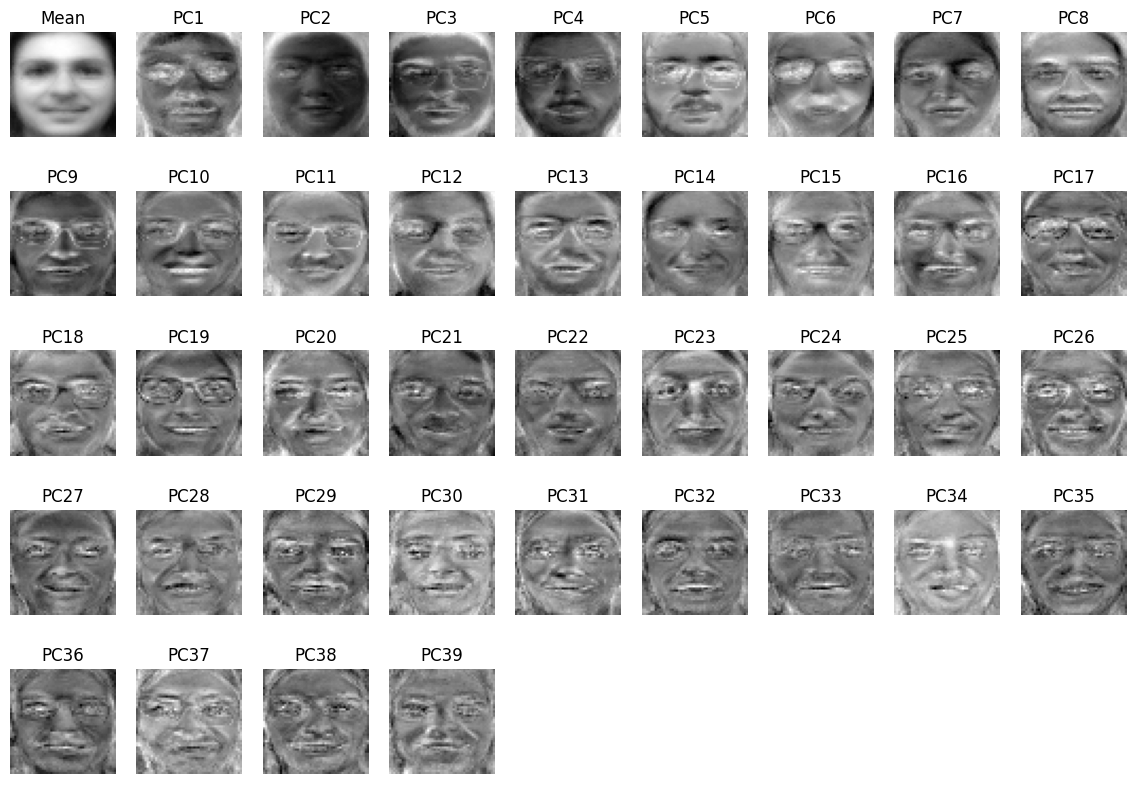

In [4]:
# Grafica de las componentes.
n_eigenfaces = n_max
n_cols = 9

n_rows = (n_eigenfaces + 1) // n_cols
if (n_eigenfaces + 1) % n_cols:
    n_rows += 1

fig, axs = plt.subplots(n_rows, n_cols, figsize=(1.6*n_cols, 2*n_rows))

# Remover los ejes para todo
for ax in axs.flatten():
    ax.set_axis_off()

# Mostrar la cara promedio
axs.flatten()[0].imshow(modelo_pca.mean_.reshape(50, 50), cmap='gray')
axs.flatten()[0].set_title('Mean')

# Hacer gráficas de las auto-caras
for i, ax in zip(range(n_eigenfaces), axs.flatten()[1:]):
    eigenface = modelo_pca.components_[i]
    ax.imshow(eigenface.reshape(50,50), cmap = plt.cm.gray)
    ax.set_title('PC{}'.format(i+1))

In [5]:
print("Dimensión de los datos sin transformar",imagenes_2d.shape)
print("Dimensión de las componentes:",componentes_principales.shape)

# Rotamos los datos originales multiplicando por la matriz de componentes principales
x_pca = modelo_pca.transform(imagenes_2d)

print("Minino valor:", round(x_pca.min(),2), "Maximo valor:", round(x_pca.max(),2))

np.save('x_pca.npy', x_pca)


Dimensión de los datos sin transformar (230, 2500)
Dimensión de las componentes: (230, 2500)
Minino valor: -8.24 Maximo valor: 12.04


In [12]:
x_pca_reduc = x_pca[:,:n_max]
print(x_pca_reduc.shape)
np.save('x_pca_reduc.npy', x_pca_reduc)

(230, 39)


In [6]:
# Transformar los datos de test 
imagenes_test = np.load('face_procesadas_test.npy')

# Convertir imágenes a una matriz 2D
n_imagenes_test, h, w = imagenes_test.shape
imagenes_2d_test = imagenes_test.reshape((n_imagenes_test, h*w)) 

# Cambiar de base los valores como estan todos en escala de 0-255
imagenes_2d_test = imagenes_2d_test / 255.0

x_pca_test = modelo_pca.transform(imagenes_2d_test)
np.save('x_pca_test.npy', x_pca_test) 

In [16]:
print(x_pca_test.shape)
print(n_max)
x_pca_test_reduc = x_pca_test[:,:n_max]

np.save('x_pca_test_reduc.npy', x_pca_test_reduc) 

(23, 230)
39


IndexError: index 23 is out of bounds for axis 0 with size 23

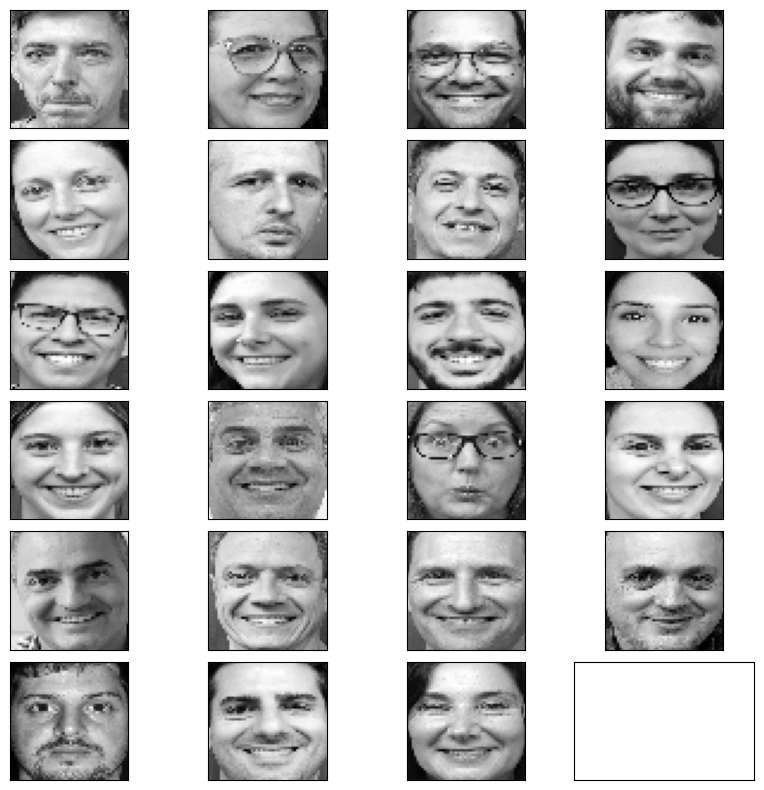

In [27]:

# Cambiar de base los valores
fotos_test = imagenes_2d_test * 255.0
 
 # Graficar las imagenes de test
fig, axes = plt.subplots(6, 4, figsize=(10, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(fotos_test[i].reshape(50,50), cmap=plt.cm.gray)